# Plot the errors for each occupation group: n 08

## Description

This program does the following using the Repeat station and IGRF error database:
- It reads the file with the dataframe from the n occupation stations group
- It plots the RMSE, Mean NRMSE and Std NRMSE values for each group

In [1]:
# Import modules
import mestrado_module as mm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

In [2]:
## Define the minimum number of occupations a station must have (n), it is a cut out value
n1 = 8
n2 = 9

# File with the chosen n repeat stations
errors_df_folder: Path = Path(mm.path_pipeline_04_igrf_calc)
errors_df_file: Path = Path(mm.output_4d_code_error_database)

# Save figures files
output_folder: Path = Path(mm.path_pipeline_06c_temporal_series_n08)

# Save figures files for rmse and nrmse
fig_rmse_f: Path = Path("00_rmse_f_plot_n_08.png")
fig_rmse_h: Path = Path("00_rmse_h_plot_n_08.png")
fig_rmse_x: Path = Path("00_rmse_x_plot_n_08.png")
fig_rmse_y: Path = Path("00_rmse_y_plot_n_08.png")
fig_rmse_z: Path = Path("00_rmse_z_plot_n_08.png")
fig_rmse_d: Path = Path("00_rmse_d_plot_n_08.png")
fig_rmse_i: Path = Path("00_rmse_i_plot_n_08.png")

# Figure style
sns.set_style("darkgrid")

## Read the data

In [3]:
df = pd.read_csv(errors_df_folder / errors_df_file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Code                      218 non-null    object 
 1   N_occupations             218 non-null    int64  
 2   RMSE_D_Original_values    218 non-null    float64
 3   RMSE_I_Original_values    218 non-null    float64
 4   RMSE_F_Original_values    218 non-null    float64
 5   RMSE_H_Original_values    218 non-null    float64
 6   RMSE_X_Original_values    218 non-null    float64
 7   RMSE_X_Calculated_values  218 non-null    float64
 8   RMSE_Y_Original_values    195 non-null    float64
 9   RMSE_Y_Calculated_values  218 non-null    float64
 10  RMSE_Z_Original_values    195 non-null    float64
 11  RMSE_Z_Calculated_values  218 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 20.6+ KB


## Plot the temporal series for each station in this n group

In [4]:
# Define variables
component_f = "Total Field"
component_h = "Horizontal Field"
component_x = "X Field"
component_y = "Y Field"
component_z = "Z Field"
component_d = "Declination Field"
component_i = "Inclination Field"

# Original
orig_symbol = "o"
orig_color = "blue"
orig_label = "Station original value"
orig_linestyle = '-'

# Calculated
calc_symbol = "+"
calc_color = "red"
calc_label = "Station calculated value"
calc_linestyle = "--"

# IGRF
igrf_symbol = "d"
igrf_color = "green"
igrf_label = "IGRF13"
igrf_linestyle = "-."

# General
axis_label_fsize = 14
title_fontsize = 16
tick_size = 14
legend_loc = "best"
dpi_quality = 300
value_bbox_inches = "tight"
fill_color = "purple"

In [5]:
# Auxiliar df
aux_df = df.loc[df["N_occupations"].between(8,9)]

## Plot the RMSE

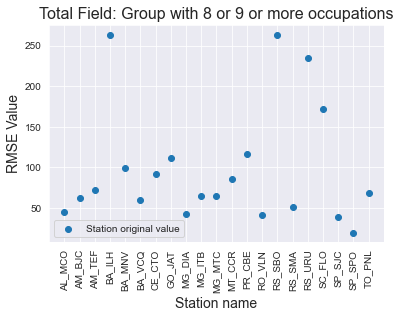

In [6]:
# F field info for plot
rmse_f = aux_df["RMSE_F_Original_values"]
station_name = aux_df["Code"]
# Figure
fig1, ax1 = plt.subplots()
ax1.scatter(station_name, rmse_f, marker = orig_symbol)
ax1.set_xlabel("Station name", fontsize=axis_label_fsize)
ax1.set_ylabel("RMSE Value", fontsize=axis_label_fsize)
ax1.set_title(f"{component_f}: Group with {n1} or {n2} or more occupations", fontsize=title_fontsize)
plt.legend([orig_label, calc_label])
plt.xticks(rotation=90)
plt.savefig(output_folder / fig_rmse_f, dpi=dpi_quality, bbox_inches=value_bbox_inches)
plt.show()

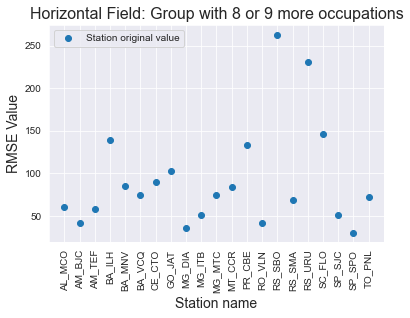

In [7]:
# H field info for plot
rmse_h = aux_df["RMSE_H_Original_values"]
station_name = aux_df["Code"]
# Figure
fig2, ax2 = plt.subplots()
ax2.scatter(station_name, rmse_h, marker = orig_symbol)
ax2.set_xlabel("Station name", fontsize=axis_label_fsize)
ax2.set_ylabel("RMSE Value", fontsize=axis_label_fsize)
ax2.set_title(f"{component_h}: Group with {n1} or {n2} more occupations", fontsize=title_fontsize)
plt.legend([orig_label, calc_label])
plt.xticks(rotation=90)
plt.savefig(output_folder / fig_rmse_h, dpi=dpi_quality, bbox_inches=value_bbox_inches)
plt.show()

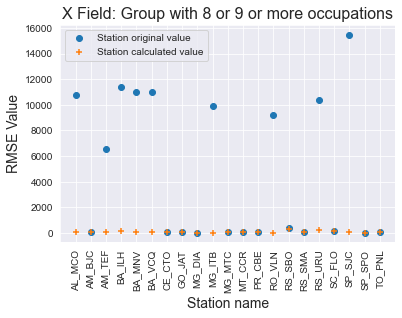

In [8]:
# X field info for plot
rmse_x_orig = aux_df["RMSE_X_Original_values"]
rmse_x_calc = aux_df["RMSE_X_Calculated_values"]
station_name = aux_df["Code"]
# Figure
fig3, ax3 = plt.subplots()
ax3.scatter(station_name, rmse_x_orig, marker = orig_symbol)
ax3.scatter(station_name, rmse_x_calc, marker = calc_symbol) 
ax3.set_xlabel("Station name", fontsize=axis_label_fsize)
ax3.set_ylabel("RMSE Value", fontsize=axis_label_fsize)
ax3.set_title(f"{component_x}: Group with {n1} or {n2} or more occupations", fontsize=title_fontsize)
plt.legend([orig_label, calc_label])
plt.xticks(rotation=90)
plt.savefig(output_folder / fig_rmse_x, dpi=dpi_quality, bbox_inches=value_bbox_inches)
plt.show()

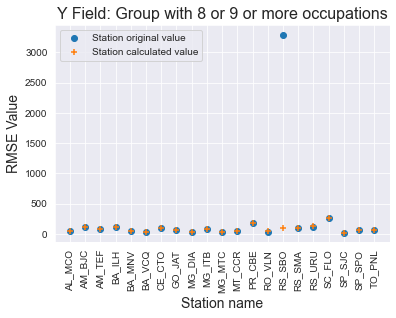

In [9]:
# Y field info for plot
rmse_y_orig = aux_df["RMSE_Y_Original_values"]
rmse_y_calc = aux_df["RMSE_Y_Calculated_values"]
station_name = aux_df["Code"]
# Figure
fig4, ax4 = plt.subplots()
ax4.scatter(station_name, rmse_y_orig, marker = orig_symbol)
ax4.scatter(station_name, rmse_y_calc, marker = "+")
ax4.set_xlabel("Station name", fontsize=axis_label_fsize)
ax4.set_ylabel("RMSE Value", fontsize=axis_label_fsize)
ax4.set_title(f"{component_y}: Group with {n1} or {n2} or more occupations", fontsize=title_fontsize)
plt.legend([orig_label, calc_label])
plt.xticks(rotation=90)
plt.savefig(output_folder / fig_rmse_y, dpi=dpi_quality, bbox_inches=value_bbox_inches)
#plt.close()
plt.show()

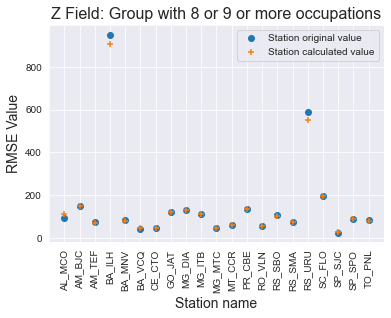

In [10]:
# Z field info for plot
rmse_z_orig = aux_df["RMSE_Z_Original_values"]
rmse_z_calc = aux_df["RMSE_Z_Calculated_values"]
station_name = aux_df["Code"]
# Figure
fig4, ax5 = plt.subplots()
ax5.scatter(station_name, rmse_z_orig, marker = orig_symbol)
ax5.scatter(station_name, rmse_z_calc, marker = "+")
ax5.set_xlabel("Station name", fontsize=axis_label_fsize)
ax5.set_ylabel("RMSE Value", fontsize=axis_label_fsize)
ax5.set_title(f"{component_z}: Group with {n1} or {n2} or more occupations", fontsize=title_fontsize)
plt.legend([orig_label, calc_label])
plt.xticks(rotation=90)
plt.savefig(output_folder / fig_rmse_z, dpi=dpi_quality, bbox_inches=value_bbox_inches)
#plt.close()
plt.show()

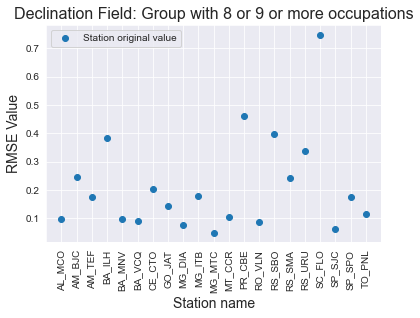

In [11]:
# D field info for plot
rmse_d = aux_df["RMSE_D_Original_values"]
station_name = aux_df["Code"]
# Figure
fig6, ax6 = plt.subplots()
ax6.scatter(station_name, rmse_d, marker = orig_symbol)
ax6.set_xlabel("Station name", fontsize=axis_label_fsize)
ax6.set_ylabel("RMSE Value", fontsize=axis_label_fsize)
ax6.set_title(f"{component_d}: Group with {n1} or {n2} or more occupations", fontsize=title_fontsize)
plt.legend([orig_label, calc_label])
plt.xticks(rotation=90)
plt.savefig(output_folder / fig_rmse_d, dpi=dpi_quality, bbox_inches=value_bbox_inches)
plt.show()

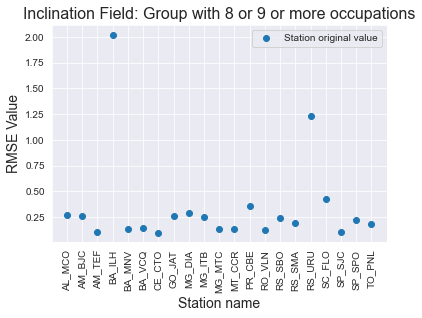

In [12]:
# I field info for plot
rmse_i = aux_df["RMSE_I_Original_values"]
station_name = aux_df["Code"]
# Figure
fig7, ax7 = plt.subplots()
ax7.scatter(station_name, rmse_i, marker = orig_symbol)
ax7.set_xlabel("Station name", fontsize=axis_label_fsize)
ax7.set_ylabel("RMSE Value", fontsize=axis_label_fsize)
ax7.set_title(f"{component_i}: Group with {n1} or {n2} or more occupations", fontsize=title_fontsize)
plt.legend([orig_label, calc_label])
plt.xticks(rotation=90)
plt.savefig(output_folder / fig_rmse_i, dpi=dpi_quality, bbox_inches=value_bbox_inches)
plt.show()